In [23]:
import requests 
import pandas as pd
import os       
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [24]:
df = pd.read_csv("1111ניקוי מעודכן סופי")


In [25]:
regressor=LinearRegression()

X=df[df.columns[df.columns != 'Price']]
Y=df[['Price']]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )

regressor.fit(X_train , Y_train)

Y_pred=regressor.predict(X_test)

<AxesSubplot:xlabel='Price'>

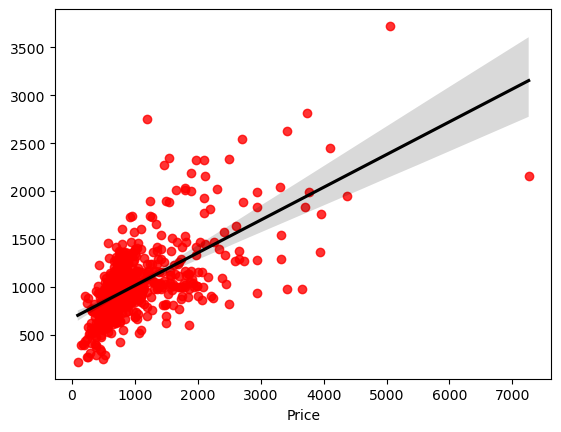

In [26]:
sns.regplot(Y_test, Y_pred, scatter_kws={'color':'red'}, line_kws={'color':'black'})

In [27]:
mse= mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
rmse

564.4439724980192

In [28]:
pred=regressor.score(X_test,Y_test)
print(pred)

0.40118653346722677


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                2995 non-null   int64  
 1   Price                2995 non-null   float64
 2   ProcessorSpeed       2995 non-null   float64
 3   RAMSize              2995 non-null   int64  
 4   ScreenSize           2995 non-null   float64
 5   ReleaseYear          2995 non-null   float64
 6   SSD                  2995 non-null   int64  
 7   Touchscreen          2995 non-null   int64  
 8   Webcam               2995 non-null   int64  
 9   OpticalDrive         2995 non-null   int64  
 10  TotalUSBConnections  2995 non-null   int64  
 11  Width                2995 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 280.9 KB


In [30]:
X=df[df.columns[df.columns != 'Price']]
Y=df[['Price']]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )

regressor.fit(X_train , Y_train)
Y_pred=regressor.predict(X_test)

In [31]:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 257127.112172993
Root Mean Squared Error (RMSE): 507.07702784980603
Mean Absolute Error (MAE): 259.152939469211
R-squared (R2): 0.5167211922797441


In [32]:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regression model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 211556.1504236106
Root Mean Squared Error (RMSE): 459.95233494744934
Mean Absolute Error (MAE): 250.20148569454136
R-squared (R2): 0.6023733036995997


In [33]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# assuming your data is in a pandas DataFrame called df
X = df.drop('Price', axis=1) # features
y = df['Price'] # target

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(X.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model.fit(X_train, y_train, epochs=10)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')



Epoch 1/10
75/75 [==============================] - 1s 2ms/step - loss: 692120.3750
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 378307.6250
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 360869.5938
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 344020.7188
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 334766.6875
Epoch 6/10
75/75 [==============================] - 0s 2ms/step - loss: 328125.8750
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 327042.9375
Epoch 8/10
75/75 [==============================] - 0s 2ms/step - loss: 323864.6875
Epoch 9/10
75/75 [==============================] - 0s 2ms/step - loss: 321453.0938
Epoch 10/10
19/19 [==============================] - 0s 1ms/step
MSE: 258237.60
MAE: 389.46
R-squared: 0.28


In [34]:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 383383.8673669792
Root Mean Squared Error (RMSE): 619.1799959357369
Mean Absolute Error (MAE): 293.60732802687016
R-squared (R2): 0.2794174960607082


In [35]:
#random Forest:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))

0.5155096761701325


In [36]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# assuming your data is in a pandas DataFrame called df
X = df.drop('Price', axis=1) # features
y = df['Price'] # target

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(X.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model.fit(X_train, y_train, epochs=10)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Epoch 1/10
75/75 [==============================] - 1s 2ms/step - loss: 425993.1250
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 301827.7812
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 285991.8125
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 277918.5000
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 276974.1562
Epoch 6/10
75/75 [==============================] - 0s 2ms/step - loss: 272232.4062
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 268077.4375
Epoch 8/10
75/75 [==============================] - 0s 2ms/step - loss: 267390.8125
Epoch 9/10
75/75 [==============================] - 0s 2ms/step - loss: 263906.5625
Epoch 10/10
19/19 [==============================] - 0s 2ms/step
MSE: 455908.58
MAE: 434.20
R-squared: 0.20


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# assuming your data is in a pandas DataFrame called df
X = df.drop('Price', axis=1) # features
y = df['Price'] # target

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create and fit the model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

print(f'R-squared: {r2:.2f}')

MSE: 217130.02
MAE: 279.68
R-squared: 0.49


In [38]:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 401064.46155380877
Root Mean Squared Error (RMSE): 633.2965036646016
Mean Absolute Error (MAE): 295.4355681492964
R-squared (R2): 0.24618624165822456
